In [84]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [4]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
# Labels as y

y = train_data.iloc[:, 0]

In [6]:
# Get data points as matrix for training

train_data_f = np.array(train_data.loc[:, train_data.columns != 'label'])
train_data_f[np.isnan(train_data_f)] = 0

In [7]:
train_data_f.shape

(27455, 784)

In [8]:
# Normalizing Train Data - Subtracting mean and Dividing by SD
train_mean = np.mean(train_data_f)
train_sd = np.std(train_data_f)
train_norm = (train_data_f - train_mean)/train_sd

In [9]:
train_norm.shape

(27455, 784)

In [98]:
# x_train = train_norm.reshape(-1, 28, 28, 1)
x_train = train_norm.reshape((27455, 28,28))

In [99]:
x_train.shape

(27455, 28, 28)

In [54]:
# x_train = x_train.reshape(-1, 28, 28, 1)

In [70]:
# RNN Training libraries import

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

In [96]:
def build_model():

    model = tf.keras.Sequential([
      tf.keras.layers.SimpleRNN(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='tanh', kernel_regularizer=l2()),      
      tf.keras.layers.Dense(units=25, activation='sigmoid')
    ])
    
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
    print (model.summary)

    return model

In [71]:
y_train = to_categorical(y)

In [100]:
model = build_model()
history = model.fit(x_train, y_train, batch_size=32, epochs = 10)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f8fbee7f550>>
Epoch 1/10
858/858 [==============================] - 55s 13ms/step - loss: 2.4669 - auc: 0.8606 - precision_15: 0.0806 - recall_15: 0.9270 - accuracy: 0.3124
Epoch 2/10
858/858 [==============================] - 11s 13ms/step - loss: 1.3408 - auc: 0.9524 - precision_15: 0.0935 - recall_15: 0.9953 - accuracy: 0.5627
Epoch 3/10
858/858 [==============================] - 12s 14ms/step - loss: 0.9847 - auc: 0.9634 - precision_15: 0.0960 - recall_15: 0.9981 - accuracy: 0.6824
Epoch 4/10
858/858 [==============================] - 11s 13ms/step - loss: 0.7571 - auc: 0.9673 - precision_15: 0.0962 - recall_15: 0.9991 - accuracy: 0.7607
Epoch 5/10
858/858 [==============================] - 10s 12ms/step - loss: 0.6403 - auc: 0.9679 - precision_15: 0.0965 - recall_15: 0.9991 - accuracy: 0.8093
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 0.5593 - auc: 0.9674 - precision_15

In [102]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

print(history.history.keys())
train_loss = history.history['loss']
train_auc = history.history['auc']
train_acc = history.history['accuracy']
train_recall = history.history['recall_15']
train_prec = history.history['precision_15']

dict_keys(['loss', 'auc', 'precision_15', 'recall_15', 'accuracy'])


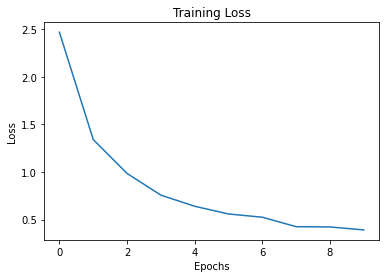

In [103]:
# Plot and label the =loss values
plt.plot(list(range(0,10)), train_loss)
 
# Add in a title and axes labels
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plot
plt.show()

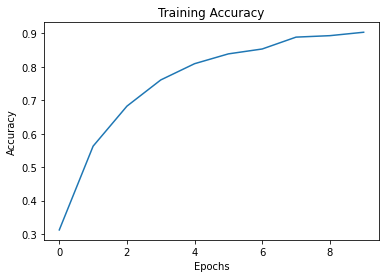

In [104]:
# Plot and label the accuracy values
plt.plot(list(range(0,10)), train_acc)
 
# Add in a title and axes labels
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

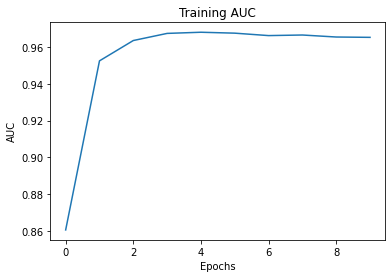

In [105]:
# Plot and label the AUC values
plt.plot(list(range(0,10)), train_auc)
 
# Add in a title and axes labels
plt.title('Training AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')

# Display the plot
plt.show()

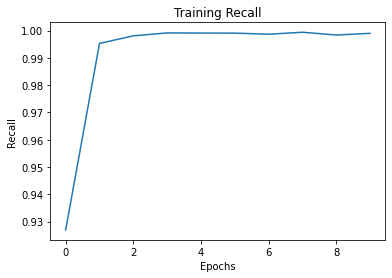

In [106]:
# Plot and label the Recall values
plt.plot(list(range(0,10)), train_recall)
 
# Add in a title and axes labels
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')

# Display the plot
plt.show()

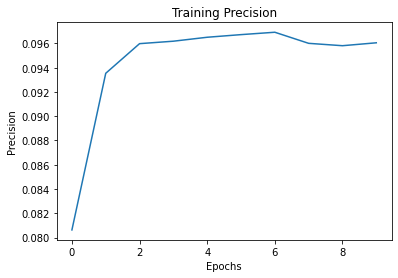

In [107]:
# Plot and label the Precision values
plt.plot(list(range(0,10)), train_prec)
 
# Add in a title and axes labels
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')

# Display the plot
plt.show()